<a href="https://colab.research.google.com/github/bharu6522/Machine-Learning-Techniques/blob/main/Assignment_3___IME_672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_csv("/content/processedhungarian.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
33,55,1,3,0,0,0,0,155,0,1.5,2,?,?,3
93,58,1,4,110,198,0,0,110,0,0,?,?,?,1
73,54,1,4,136,220,0,0,140,1,3,2,?,?,3
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
145,54,1,2,?,182,0,1,?,?,?,?,?,?,0


In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [ ]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [ ]:
df.shape

(200, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [ ]:
# to know the type of variables 
df.nunique()

age          39
sex           2
cp            4
trestbps     41
chol        100
fbs           3
restecg       3
thalach      60
exang         3
oldpeak      15
slope         4
ca            2
thal          4
num           5
dtype: int64

In [ ]:
df['slope'].unique()

array(['2', '?', '3', '1'], dtype=object)

In [ ]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
178,58,1,4,160,256,1,2,113,1,1,1,?,?,3
46,59,1,4,122,233,0,0,117,1,1.3,3,?,?,1
66,67,1,1,142,270,1,0,125,0,2.5,1,?,?,3


In [ ]:
# ca: number of major vessels (0-3) colored by flourosopy
df['ca'].unique()
# feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0 & ? 

array(['?', '0'], dtype=object)

In [ ]:
# ca column is not important so can be dropped 
df1 = df.drop(columns = ['ca'])

In [ ]:
df1.shape

(200, 13)

In [ ]:
df1.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
158,69,1,4,?,210,1,1,?,?,?,?,?,2
184,57,1,4,130,207,0,1,96,1,1,2,?,0
68,65,1,4,?,0,0,0,?,?,?,?,?,1


In [ ]:
# replace ? with Nan for better intution 
df1.replace(to_replace = "?", value = np.NaN, inplace= True) 
df1.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
13,63,1,3,NaN,0,0,2,NaN,NaN,NaN,NaN,NaN,1
46,59,1,4,122,233,0,0,117,1,1.3,3,NaN,1
38,58,1,4,NaN,203,1,0,NaN,NaN,NaN,NaN,NaN,1
72,65,1,1,NaN,252,0,0,NaN,NaN,NaN,NaN,NaN,0
27,60,1,4,130,186,1,1,140,1,0.5,2,NaN,1


In [ ]:
df1['thal'].value_counts()

7    22
6     8
3     4
Name: thal, dtype: int64

In [ ]:
df1.isnull().values.any()

True

In [ ]:
df1.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
thal        166
num           0
dtype: int64

In [ ]:
null_var = (df1.isnull().sum()/df1.shape[0])*100

In [ ]:
null_var
# we can see that in 'thal' coulmn 83 % values are missing. so its better idea to drop that column

age          0.0
sex          0.0
cp           0.0
trestbps    28.0
chol         3.5
fbs          3.5
restecg      0.0
thalach     26.5
exang       26.5
oldpeak     28.0
slope       51.0
thal        83.0
num          0.0
dtype: float64

In [ ]:
df1.drop(null_var['thal'], inplace = True)
df1.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,0
119,56,1,4,NaN,0,0,2,NaN,NaN,NaN,NaN,NaN,1
163,69,1,4,NaN,289,1,1,NaN,NaN,NaN,NaN,NaN,3
74,72,1,3,120,214,0,0,102,1,1,2,NaN,3
176,61,1,4,190,287,1,2,150,1,2,3,NaN,4


In [ ]:
df1.shape

(199, 13)

In [ ]:
num_var = df1.select_dtypes(include = ['int64','float64'])
cat_var = df1.select_dtypes(include = ['object'])

In [ ]:
df1['slope'].value_counts()

2    52
3    29
1    16
Name: slope, dtype: int64

In [ ]:
duplicate_row = df1.duplicated().sum()
if duplicate_row: 
  print('Duplicate row in dataset are : {}'.format(duplicate_row))

duplicate_row = df1[df1.duplicated(keep = False)]
duplicate_row

Duplicate row in dataset are : 1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
139,58,1,3,150,219,0,1,118,1,0,NaN,NaN,2
187,58,1,3,150,219,0,1,118,1,0,NaN,NaN,2


In [ ]:
# need to drop duplicate row 
df1 = df1.drop_duplicates()
df1.shape

(198, 13)

In [ ]:
df1['num'].value_counts()

1    56
0    51
3    42
2    39
4    10
Name: num, dtype: int64

In [ ]:
df1.describe()

,age,sex,cp,restecg,num
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,59.343434,0.969697,3.505051,0.737374,1.515152
std,7.848388,0.171854,0.798142,0.684652,1.224651
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [ ]:
df['cp'].unique()

array([4, 3, 2, 1])

In [ ]:
df1.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
185,61,1,3,NaN,284,0,0,NaN,NaN,NaN,NaN,NaN,1
85,63,1,4,130,308,0,0,138,1,2,2,NaN,2
109,45,1,3,NaN,236,0,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
total_null_var = ['trestbps','chol','fbs','thalach','exang','oldpeak','slope']

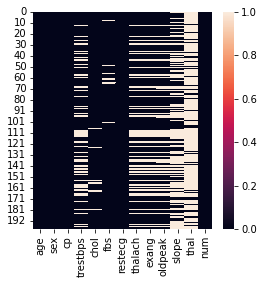

In [ ]:
plt.figure(figsize = (4,4))
sns.heatmap(df1.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


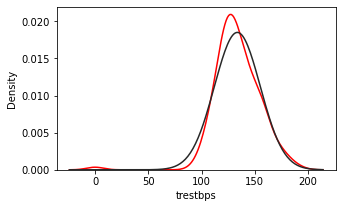

In [ ]:
plt.figure(figsize=(5,3))
sns.distplot(df1["trestbps"], color="r",kde=True,hist = False, fit = norm) 
# here we can see in the below diagram that 'trestbps' is showing either right- skwed or approx normal distribution . so we can fill nan value with either mean or median 

In [ ]:
df1['trestbps'].mode()

0    120
dtype: object

In [ ]:
# df1['trestbps'].fillna(df1['trestbps'].mode()[0], inplace = True) # write the reason for mode()[0]
# df1.sample(7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

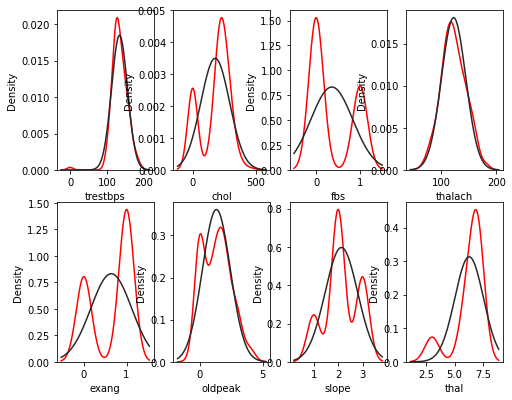

In [ ]:
plt.figure(figsize = (8,10))
for i,var in enumerate(cat_var):
  plt.subplot(3,4,i+1)
  sns.distplot(df1[var], color="r",kde=True,hist = False, fit = norm)

In [ ]:
# here we have filled all the missing values of cat_var by mode 
for i,var in enumerate(cat_var):
  df1[var].fillna(df1[var].mode(),inplace = True)

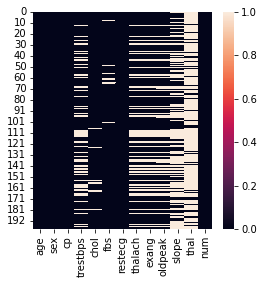

In [ ]:
plt.figure(figsize = (4,4))
sns.heatmap(df1.isnull())

In [ ]:
df1.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
40,61,1,3,120,0,0,0,80,1,0,2,NaN,3
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#Before we plot the outliers, let's change the labeling for better visualization and interpretation.

df1.loc['sex'] = df1.sex.replace({1: "Male", 0: "Female"})
df1.loc['cp'] = df1.cp.replace({1: "typical angina", 
                          2: "atypical angina", 
                          3:"non anginal pain",
                          4: "asymptomatic"})
df1.exang = df1.exang.replace({1: "Yes", 0: "No"},inplace = True)
df1.loc['fbs'] = df1.fbs.replace({1: "True", 0: "False"})
df1.loc['slope'] = df1.slope.replace({1: "upsloping", 2: "flat",3:"downsloping"})
df1.loc['thal'] = df1.thal.replace({6: "fixed_defect", 7: "reversable_defect", 3:"normal"})


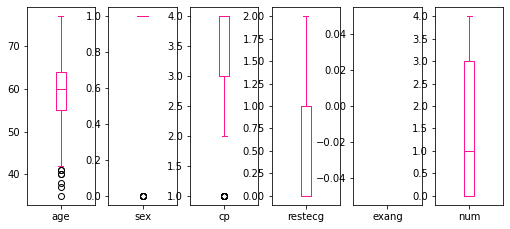

In [ ]:
df1.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(10, 8), color='deeppink');